# Advection Diffusion test

## Training

In [1]:
import spdepy as sp
import numpy as np
from scipy import sparse
from tqdm import tqdm
import matplotlib.pyplot as plt
x = np.linspace(0, 20.0, 40)
y = np.linspace(0, 20.0, 40)
t = np.linspace(0, 10.0, 10)
bc = 3


mod0 = sp.model(grid = sp.grid(x=x, y=y,extend = 5),spde = 'whittle-matern',ha = False, bc = bc, 
                anisotropic = True,parameters= np.hstack([[-4]*9,[-2.0]*9,[0.5]*9,[-0.5]*9,1]))


mod = sp.model(grid = sp.grid(x=x, y=y,t = t,extend = 5), Q0 = mod0.mod.Q,
         spde = 'advection-diffusion',ha = False, bc = bc, anisotropic = True)

In [2]:
mod.mod.setQ(par = np.array([-4,-2,2,-2,10,-10,0,1]))
mod.setModel(mu = np.zeros(mod.grid.N*mod.grid.M*mod.grid.T))
tmp = mod.sample().reshape(mod.grid.T,mod.grid.N,mod.grid.M)
i = 0

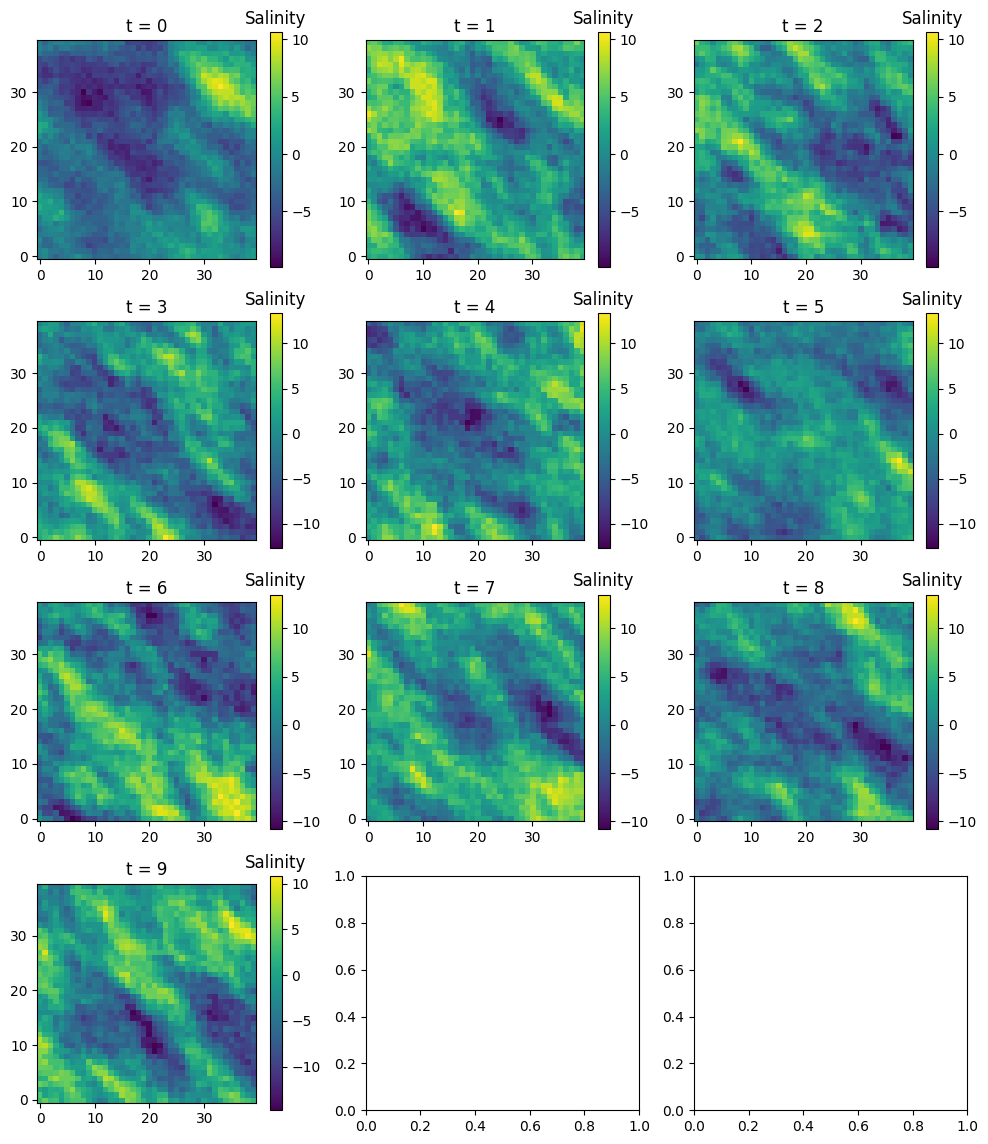

In [3]:

im = list()
clb = list()
fig,ax = plt.subplots(ncols = 3, nrows = 4, figsize = (12,14))
for i in range(4):
    for j in range(3):
        if i*3 + j > 9:
            break
        im.append(ax[i,j].imshow(tmp[i*3 + (j),:,:],origin = 'lower'))
        clb.append(fig.colorbar(im[i*3],ax = ax[i,j]))
        clb[i*3 + j].ax.set_title('Salinity')
        ax[i,j].set_title('t = %d'%(i*3+j))

In [4]:

tmp = mod.sample(n = 100)

In [11]:

bc = 3

mod = sp.model(grid = sp.grid(x=x, y=y,t = t,extend = 5), Q0 = mod0.mod.Q,
            spde = 'advection-diffusion',ha = False, bc = bc, anisotropic = True)

mod.fit(data = tmp,verbose = True,lr = np.hstack([[0.01]*10,[0.1]*20,[0.5]*50,[1]*200]),
            end = "../fits/test_AD3",stepType = 'adam',beta1 = 0.9, beta2 = 0.99,fix = [6,7],x0 = x0)


Adam optimizer with beta1: 0.9, beta2: 0.99, epsilon: 1e-08
--------------------------------------------------------------
#   0 | fun = 0.8482 | κ = 0.02, γ = 0.17, vx = 1.90, vy = -1.91, wx = 8.92, wy = -8.82, σ = 1.00, τ = 2.72
#   1 | fun = 0.8482 | κ = 0.02, γ = 0.18, vx = 1.91, vy = -1.92, wx = 8.93, wy = -8.83, σ = 1.00, τ = 2.72
#   2 | fun = 0.8483 | κ = 0.02, γ = 0.18, vx = 1.91, vy = -1.92, wx = 8.93, wy = -8.83, σ = 1.00, τ = 2.72
#   3 | fun = 0.8483 | κ = 0.02, γ = 0.18, vx = 1.91, vy = -1.92, wx = 8.93, wy = -8.83, σ = 1.00, τ = 2.72
#   4 | fun = 0.8482 | κ = 0.02, γ = 0.18, vx = 1.91, vy = -1.91, wx = 8.93, wy = -8.83, σ = 1.00, τ = 2.72
#   5 | fun = 0.8482 | κ = 0.02, γ = 0.17, vx = 1.90, vy = -1.90, wx = 8.93, wy = -8.83, σ = 1.00, τ = 2.72
#   6 | fun = 0.8482 | κ = 0.02, γ = 0.17, vx = 1.90, vy = -1.90, wx = 8.93, wy = -8.83, σ = 1.00, τ = 2.72
#   7 | fun = 0.8482 | κ = 0.02, γ = 0.17, vx = 1.89, vy = -1.89, wx = 8.93, wy = -8.83, σ = 1.00, τ = 2.72
#   8 | fun =

{'method': 'adam',
 'x': array([ -4.08581801,  -2.19415077,   2.06895219,  -2.07944616,
         11.2905311 , -11.12762976,   0.        ,   1.        ]),
 'fun': 0.8485128341651935,
 'jac': array([-0.02745646, -0.00039759, -0.0056403 ,  0.006842  , -0.00056464,
         0.00063753,  0.01372391, -0.00369154])}

In [12]:
x0 = mod.getPars()

In [13]:
mod.mod.print(np.array([-4,-2,2,-2,10,-10,-1,1]))

'| κ = 0.02, γ = 0.14, vx = 2.00, vy = -2.00, wx = 10.00, wy = -10.00, σ = 0.37, τ = 2.72'

In [16]:
mod.mod.logLike(np.array([-4,-2,2,-2,10,-10,0,1]))

(0.8481411333694178,
 array([ 2.23132020e-04,  1.28192356e-05,  3.13585729e-04,  3.48450964e-04,
        -1.28124736e-05, -3.28157767e-05, -1.10599884e-04,  3.22202055e-05]))

In [15]:
mod.mod.logLike(mod.getPars())

(0.8481569842942813,
 array([ 1.00951805e-03,  1.01430498e-05, -7.66252306e-05, -1.05358916e-04,
         7.64139280e-05, -1.64141608e-05, -5.04917903e-04, -3.13615742e-05]))

In [34]:
mod.mod.logLike(np.array([-4,-2,2,-2,10,-10,-1,1]))

(0.5571522642249802,
 array([ 5.81517797e-04,  2.95524580e-05,  7.12086444e-04, -4.07630227e-04,
         2.76875020e-05,  8.48674394e-05, -2.90681184e-04,  6.17674030e-04]))

### Test half-angle stuff

In [34]:
import spdepy as sp
import numpy as np
from scipy import sparse
from tqdm import tqdm
import matplotlib.pyplot as plt
x = np.linspace(0, 20.0, 40)
y = np.linspace(0, 20.0, 40)
t = np.linspace(0, 10.0, 10)
bc = 3


mod0 = sp.model(grid = sp.grid(x=x, y=y,extend = 5),spde = 'whittle-matern',ha = True, bc = bc, 
                anisotropic = True,parameters= np.hstack([[-2]*9,[-2.0]*9,[0.7]*9,[-0.3]*9,1]))


mod = sp.model(grid = sp.grid(x=x, y=y,t = t,extend = 5), Q0 = mod0.mod.Q,
         spde = 'advection-diffusion',ha = True, bc = bc, anisotropic = True)

In [35]:
parameters = np.array([-4,-2,0.7,-0.3,10,-10,0,1])
mod.mod.setQ(par = parameters)
mod.setModel(mu = np.zeros(mod.grid.N*mod.grid.M*mod.grid.T))
tmp = mod.sample().reshape(mod.grid.T,mod.grid.N,mod.grid.M)
i = 0

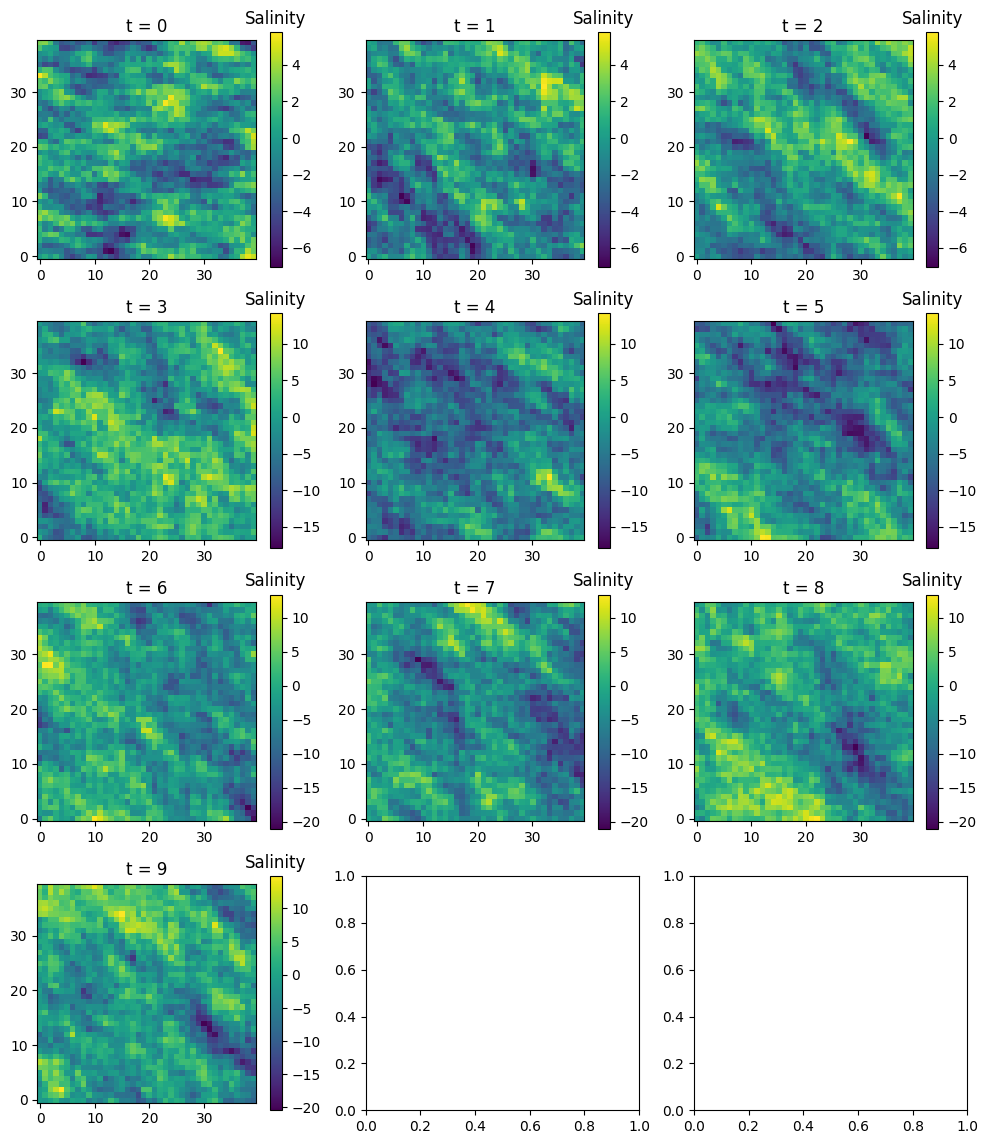

In [36]:

im = list()
clb = list()
fig,ax = plt.subplots(ncols = 3, nrows = 4, figsize = (12,14))
for i in range(4):
    for j in range(3):
        if i*3 + j > 9:
            break
        im.append(ax[i,j].imshow(tmp[i*3 + (j),:,:],origin = 'lower'))
        clb.append(fig.colorbar(im[i*3],ax = ax[i,j]))
        clb[i*3 + j].ax.set_title('Salinity')
        ax[i,j].set_title('t = %d'%(i*3+j))

In [4]:

tmp = mod.sample(n = 100)

In [11]:
bc = 3

mod = sp.model(grid = sp.grid(x=x, y=y,t = t,extend = 5), Q0 = mod0.mod.Q,
            spde = 'advection-diffusion',ha = True , bc = bc, anisotropic = True)

mod.fit(data = tmp,verbose = True,lr = np.hstack([[0.01]*10,[1]*100]),
            end = "../fits/test_AD3",stepType = 'adam',beta1 = 0.9, beta2 = 0.999,
            fix = [6],x0 = x0)  


Adam optimizer with beta1: 0.9, beta2: 0.999, epsilon: 1e-08
--------------------------------------------------------------
#   0 | fun = 0.2484 | κ = 0.04, γ = 0.18, vx = -0.16, vy = -0.18, wx = 19.81, wy = -19.45, σ = 0.37, τ = 2.75
#   1 | fun = 0.2484 | κ = 0.04, γ = 0.18, vx = -0.16, vy = -0.19, wx = 19.81, wy = -19.45, σ = 0.37, τ = 2.74
#   2 | fun = 0.2484 | κ = 0.04, γ = 0.18, vx = -0.15, vy = -0.19, wx = 19.81, wy = -19.45, σ = 0.37, τ = 2.73
#   3 | fun = 0.2484 | κ = 0.04, γ = 0.18, vx = -0.15, vy = -0.19, wx = 19.80, wy = -19.44, σ = 0.37, τ = 2.73
#   4 | fun = 0.2484 | κ = 0.04, γ = 0.18, vx = -0.15, vy = -0.19, wx = 19.80, wy = -19.44, σ = 0.37, τ = 2.73
#   5 | fun = 0.2484 | κ = 0.04, γ = 0.18, vx = -0.15, vy = -0.20, wx = 19.80, wy = -19.44, σ = 0.37, τ = 2.73
#   6 | fun = 0.2484 | κ = 0.04, γ = 0.18, vx = -0.15, vy = -0.20, wx = 19.80, wy = -19.44, σ = 0.37, τ = 2.73
#   7 | fun = 0.2484 | κ = 0.04, γ = 0.18, vx = -0.15, vy = -0.20, wx = 19.80, wy = -19.44, σ = 0.3

{'method': 'adam',
 'x': array([ -3.4372732 ,  -1.43520848,   0.6041231 ,  -0.77861584,
         22.4058767 , -22.47770744,  -1.        ,   1.00200108]),
 'fun': 0.24836298864917722,
 'jac': array([-3.60760127e-03, -8.91126107e-05, -1.87099681e-05,  4.83220168e-05,
        -7.60301626e-05,  9.22813055e-05,  1.80536730e-03, -3.90208402e-03])}

In [14]:
mod.getPars()

array([ -3.4372732 ,  -1.43520848,   0.6041231 ,  -0.77861584,
        22.4058767 , -22.47770744,  -1.        ,   1.00200108])

In [12]:
mod.mod.logLike(np.array([-4,-1,0.7,-0.3,40,-40,-1,1]))

(0.2482524540901659,
 array([-3.76737899e-04, -1.31544284e-04, -1.01786067e-04,  1.46750406e-05,
         1.63304340e-06,  7.00106806e-06,  1.88289970e-04, -2.97202249e-04]))

In [13]:
mod.mod.logLike(mod.getPars())

(0.24833122526296725,
 array([-2.35095102e-04, -4.15357109e-05, -2.90218708e-05,  1.38773397e-05,
        -3.29096764e-05, -1.12235771e-05,  1.19131807e-04,  2.43155038e-04]))

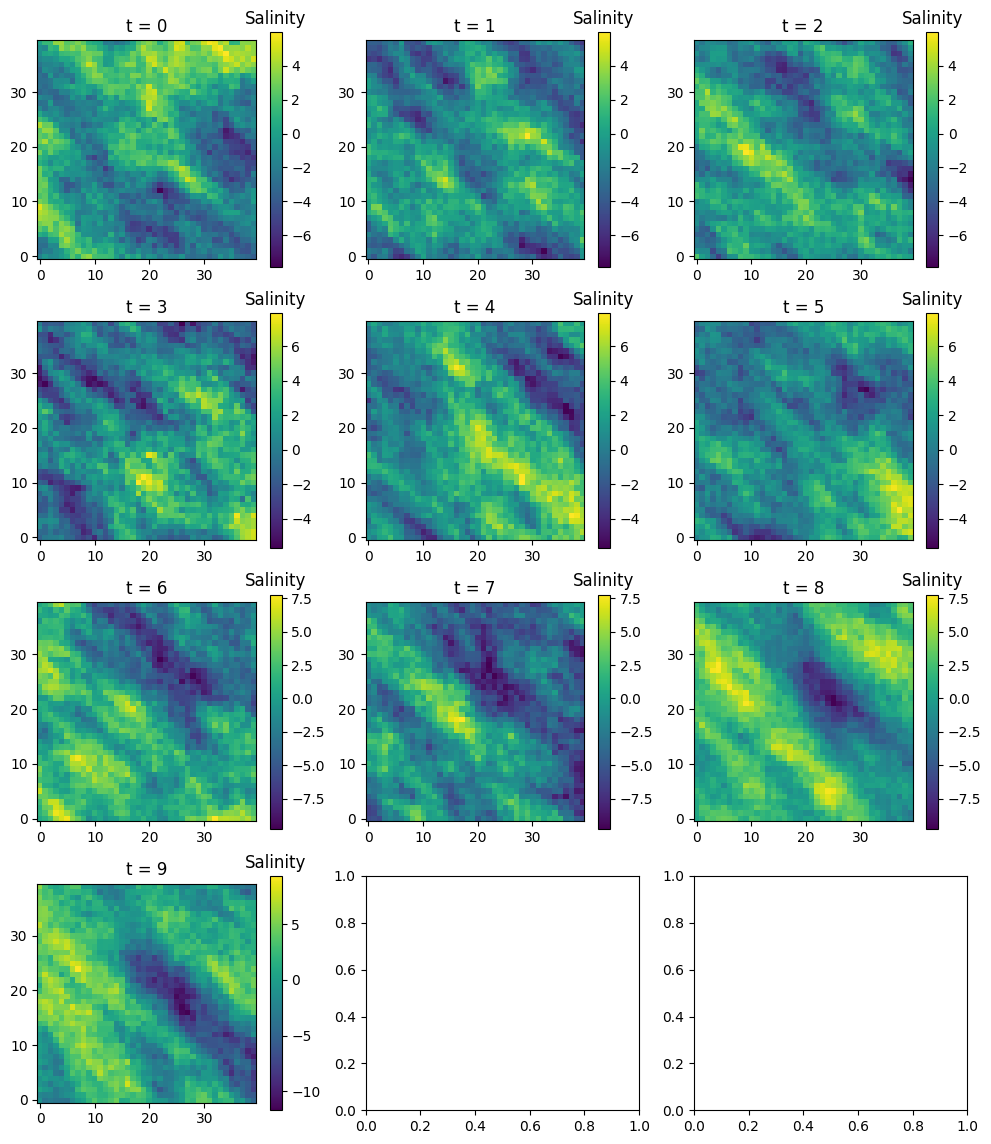

In [31]:
mod.setModel(mu = np.zeros(mod.grid.N*mod.grid.M*mod.grid.T))
tmp = mod.sample().reshape(mod.grid.T,mod.grid.N,mod.grid.M)
i = 0

im = list()
clb = list()
fig,ax = plt.subplots(ncols = 3, nrows = 4, figsize = (12,14))
for i in range(4):
    for j in range(3):
        if i*3 + j > 9:
            break
        im.append(ax[i,j].imshow(tmp[i*3 + (j),:,:],origin = 'lower'))
        clb.append(fig.colorbar(im[i*3],ax = ax[i,j]))
        clb[i*3 + j].ax.set_title('Salinity')
        ax[i,j].set_title('t = %d'%(i*3+j))

## Test prediction on set values

In [6]:
import spdepy as sp
import numpy as np
from scipy import sparse
from tqdm import tqdm
import matplotlib.pyplot as plt
x = np.linspace(0, 20.0, 40)
y = np.linspace(0, 20.0, 40)
t = np.linspace(0, 10.0, 10)
bc = 3


mod0 = sp.model(grid = sp.grid(x=x, y=y,extend = 5),spde = 'whittle-matern',ha = False, bc = bc, 
                anisotropic = True,parameters= np.hstack([[-4]*9,[-2.0]*9,[0.5]*9,[-0.5]*9,1]))


mod = sp.model(grid = sp.grid(x=x, y=y,t = t,extend = 5), Q0 = mod0.mod.Q,
         spde = 'advection-diffusion',ha = False, bc = bc, anisotropic = True)

mod.mod.setQ(par = np.array([-4,-2,2,-2,10,-10,-1,1]))
mod.setModel(mu = np.zeros(mod.grid.N*mod.grid.M*mod.grid.T))
tmp = mod.sample(n = 40)

In [7]:
obsIdx = np.array([np.random.choice(range(mod.grid.N*mod.grid.M*mod.grid.T),size = 500*10,replace = False) for i in range(40)]).T
res = np.zeros((40,10))
for i in range(40):
    mod.setModel(mu = np.zeros(mod.grid.N*mod.grid.M*mod.grid.T))
    for j in range(10):
        mask = np.ones(mod.grid.N*mod.grid.M*mod.grid.T,bool)
        mask[obsIdx[:(j+1)*500,i]] = False
        mod.update(tmp[obsIdx[(j*500):(j+1)*500,i],i], idx = obsIdx[j*500:(j+1)*500,i])
        res[i,j] = np.mean((tmp[mask,i] - mod.grid.getS(idxs = np.arange(mod.grid.N*mod.grid.M*mod.grid.T)[mask])@mod.mu)**2)



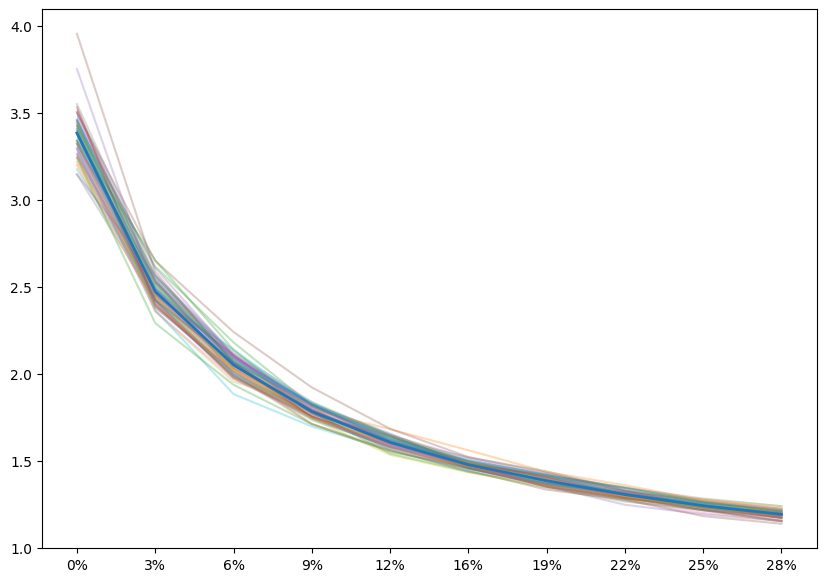

In [8]:
fig, ax = plt.subplots(figsize = (10,7))
for i in range(40):
    ax.plot(res[i,:],alpha = 0.3)
ax.plot(res.mean(axis = 0),label = "Mean",lw = 2)
ax.fill_between(range(10),res.mean(axis = 0) - res.std(axis = 0),res.mean(axis = 0) + res.std(axis = 0),alpha = 0.3)
ax.set_xticks(np.arange(10),["{:.0%}".format(500*i/(mod.grid.M*mod.grid.N*mod.grid.T)) for i in range(10)]);

## With the use of covariates

In [5]:

import spdepy as sp
import numpy as np
from scipy import sparse
from tqdm import tqdm
import matplotlib.pyplot as plt
x = np.linspace(0, 20.0, 40)
y = np.linspace(0, 20.0, 40)
t = np.linspace(0, 10.0, 10)
bc = 3


mod0 = sp.model(grid = sp.grid(x=x, y=y,extend = 5),spde = 'whittle-matern',ha = False, bc = bc, 
                anisotropic = True,parameters= np.hstack([[-4]*9,[-2.0]*9,[0.5]*9,[-0.5]*9,1]))


mod = sp.model(grid = sp.grid(x=x, y=y,t = t,extend = 5), Q0 = mod0.mod.Q,
         spde = 'advection-diffusion',ha = False, bc = bc, anisotropic = True)

mod.mod.setQ(par = np.array([-4,-2,2,-2,10,-10,-1,1]))
mod.setModel(mu = np.zeros(mod.grid.N*mod.grid.M*mod.grid.T))
tmp = mod.sample(n = 40) *0.8 + 4 
mod = sp.model(grid = sp.grid(x=x, y=y,t = t,extend = 5), Q0 = mod0.mod.Q,
            spde = 'advection-diffusion',ha = False, bc = bc, anisotropic = True)
mod.mod.setQ(par = np.array([-4,-2,2,-2,10,-10,-1,1]))
mod.setModel(mu = np.zeros(mod.grid.N*mod.grid.M*mod.grid.T),useCov = True, sigmas = np.log([0.2,2]),scale = False)

In [2]:
obsIdx = np.array([np.random.choice(range(mod.grid.N*mod.grid.M*mod.grid.T),size = 500*10,replace = False) for i in range(40)]).T
res = np.zeros((40,10))
for i in range(40):
    # mod.setModel(mu = np.zeros(mod.grid.N*mod.grid.M*mod.grid.T))
    mod.setModel(mu = np.zeros(mod.grid.N*mod.grid.M*mod.grid.T),useCov = True, sigmas = np.log([0.2,2]),scale = False)
    for j in range(10):
        mask = np.ones(mod.grid.N*mod.grid.M*mod.grid.T,bool)
        mask[obsIdx[:(j+1)*500,i]] = False
        mod.update(tmp[obsIdx[(j*500):(j+1)*500,i],i], idx = obsIdx[j*500:(j+1)*500,i])
        res[i,j] = np.mean((tmp[mask,i] - mod.grid.getS(idxs = np.arange(mod.grid.N*mod.grid.M*mod.grid.T)[mask])@mod.mu)**2)


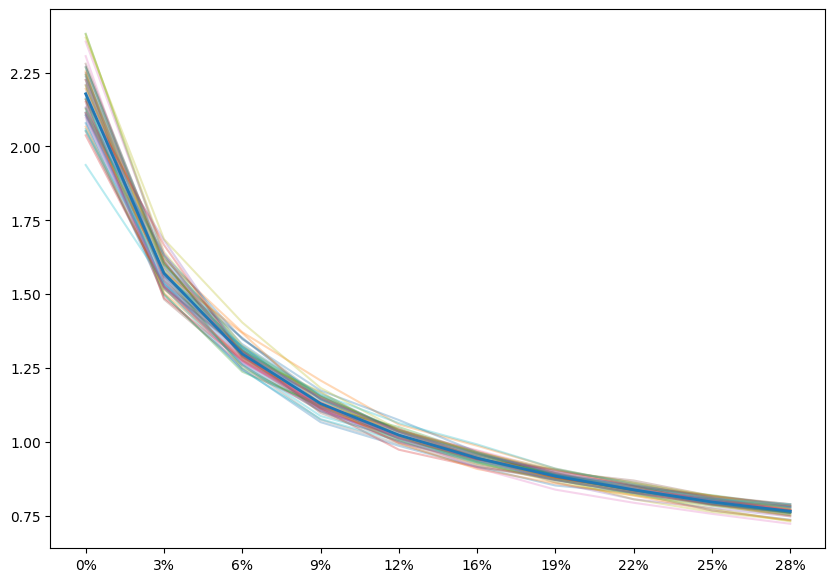

In [3]:
fig, ax = plt.subplots(figsize = (10,7))
for i in range(40):
    ax.plot(res[i,:],alpha = 0.3)
ax.plot(res.mean(axis = 0),label = "Mean",lw = 2)
ax.fill_between(range(10),res.mean(axis = 0) - res.std(axis = 0),res.mean(axis = 0) + res.std(axis = 0),alpha = 0.3)
ax.set_xticks(np.arange(10),["{:.0%}".format(500*i/(mod.grid.M*mod.grid.N*mod.grid.T)) for i in range(10)]);


In [4]:
mod.mu

array([4.15682074e-03, 1.35503668e-02, 2.86056132e-02, ...,
       3.96955258e-04, 3.70964960e+00, 0.00000000e+00])

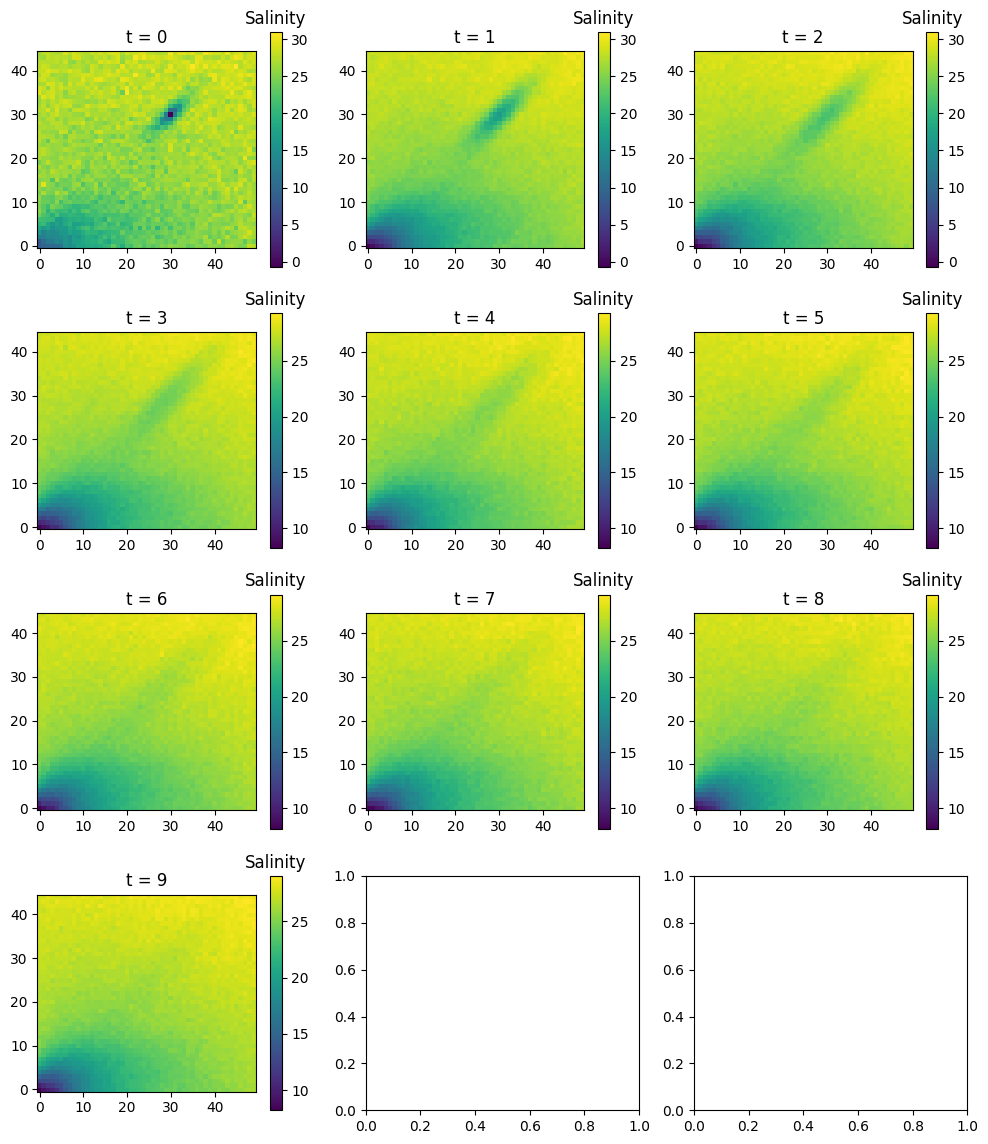

In [ ]:

im = list()
clb = list()
fig,ax = plt.subplots(ncols = 3, nrows = 4, figsize = (12,14))
for i in range(4):
    for j in range(3):
        if i*3 + j > 9:
            break
        im.append(ax[i,j].imshow(tmp[i*3 + (j),:,:],origin = 'lower'))
        clb.append(fig.colorbar(im[i*3],ax = ax[i,j]))
        clb[i*3 + j].ax.set_title('Salinity')
        ax[i,j].set_title('t = %d'%(i*3+j))

## Validation

- predict in future not in past and for all timesteps
- might not need beta1
- test with all combinations

In [ ]:
import spdepy as sp
import numpy as np
from scipy import sparse
from tqdm import tqdm
import matplotlib.pyplot as plt

data = sp.datasets.get_sinmod_training()
dataV = sp.datasets.get_sinmod_validation()

mod = sp.model(grid = sp.grid(x=data['x'], y=data['y'],extend = 5),
         spde = 'whittle-matern',ha = True, bc = 3, anisotropic = True,parameters= np.load('../fits/whittle_matern_ha_bc3.npy'))


In [ ]:
sigmas = np.log(np.array([0.00728252, 0.27113878]))
mod.setModel(mu = data['mu'],sigmas = sigmas,useCov = True)

In [ ]:
mod.setModel(mu = data['mu'], sigmas = np.log(np.array([100, 100])),useCov = True)
tmp = mod.sample().reshape(mod.grid.N,mod.grid.M)
i = 0

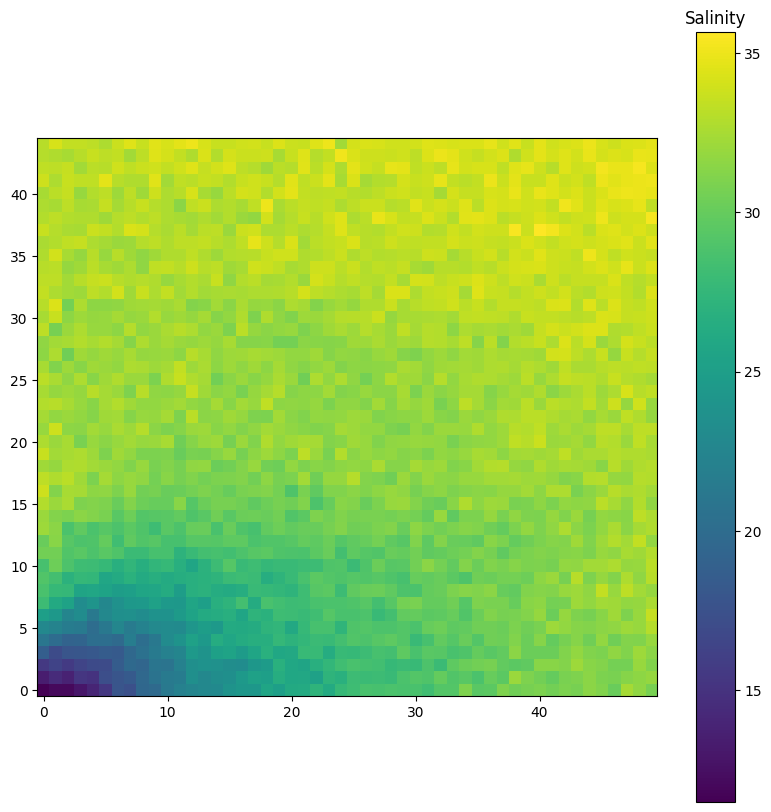

In [ ]:
mod.setModel(mu = data['mu'], sigmas = np.log(np.array([0.7051, 0.012])),useCov = True)
tmp = mod.sample().reshape(mod.grid.N,mod.grid.M)
i = 0

fig,ax = plt.subplots(figsize = (10,10))
im = ax.imshow(tmp,origin = 'lower')
clb = fig.colorbar(im,ax = ax)
clb.ax.set_title('Salinity')
i += 1

## test

In [ ]:
import spdepy as sp
import numpy as np
from scipy import sparse
from tqdm import tqdm
import matplotlib.pyplot as plt

dataTe = sp.datasets.get_sinmod_test()
data = sp.datasets.get_sinmod_training()

mod1 = sp.model(grid = sp.grid(x=data['x'], y=data['y'],extend = 5),
                spde = 'whittle-matern',ha = True, bc = 3, anisotropic = True,parameters= np.load('../fits/whittle_matern_ha_bc3.npy'))
mod1.setModel(mu = data['mu'])

mod2 = sp.model(grid = sp.grid(x=data['x'], y=data['y'],extend = 5),
                spde = 'whittle-matern',ha = True, bc = 3, anisotropic = True,parameters= np.load('../fits/whittle_matern_ha_bc3.npy'))
mod2.setModel(mu = data['mu'],sigmas = np.load("../fits/sinmod/whittle_matern_ha_bc3_sigmas2.npy"),useCov = True)

mod3 = sp.model(grid = sp.grid(x=data['x'], y=data['y'],extend = 5),
                spde = 'whittle-matern',ha = True, bc = 3, anisotropic = True,parameters= np.load('../fits/whittle_matern_ha_bc3.npy'))
mod3.setModel(mu = data['mu'],sigmas = np.log(0.198), useCov = True)

In [ ]:
res1 = np.zeros(10)
res2 = np.zeros(10)
res3 = np.zeros(10)
mod1.setModel(mu = data['mu'])
mod2.setModel(mu = data['mu'],useCov = True)
mod3.setModel(mu = data['mu'],sigmas = np.log(0.198), useCov = True)
for i in range(10):
    mod1.update(y = dataTe['data'][i]['data'].values,idx = dataTe['data'][i]['idx'].values)
    mod2.update(y = dataTe['data'][i]['data'].values,idx = dataTe['data'][i]['idx'].values)
    mod3.update(y = dataTe['data'][i]['data'].values,idx = dataTe['data'][i]['idx'].values)
    res1[i] = np.sqrt(np.mean((np.hstack([dataTe['data'][j]['data'].values for j in range(i,10)]) - mod1.grid.getS(idxs = np.hstack([dataTe['data'][j]['idx'].values for j in range(i,10)]))@mod1.mu)**2))
    res2[i] = np.sqrt(np.mean((np.hstack([dataTe['data'][j]['data'].values for j in range(i,10)]) - mod2.grid.getS(idxs = np.hstack([dataTe['data'][j]['idx'].values for j in range(i,10)]))@mod2.mu)**2))
    res3[i] = np.sqrt(np.mean((np.hstack([dataTe['data'][j]['data'].values for j in range(i,10)]) - mod3.grid.getS(idxs = np.hstack([dataTe['data'][j]['idx'].values for j in range(i,10)]))@mod3.mu)**2))

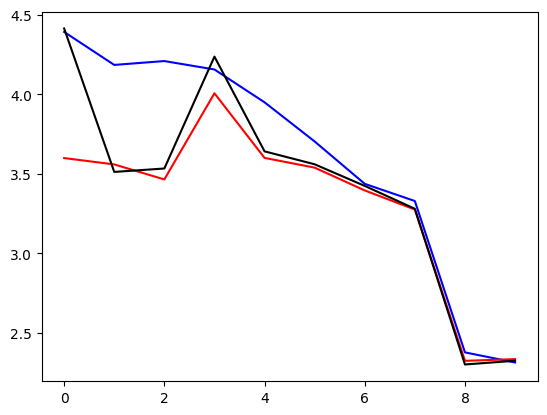

In [ ]:
plt.plot(res1,'b')
plt.plot(res2,'r')
plt.plot(res3,'k')

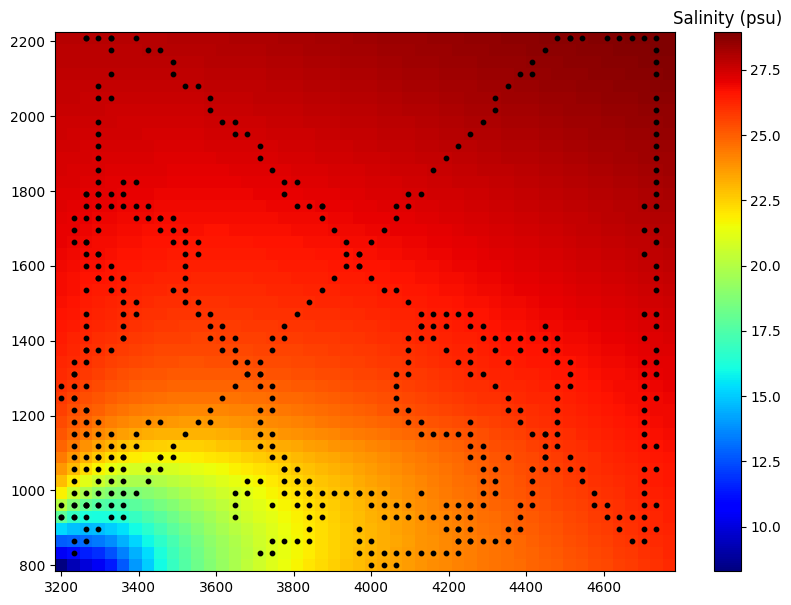

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
#im = ax.imshow((mod1.grid.getS()@mod1.mu).reshape(mod1.grid.N,mod1.grid.M),origin = 'lower')
idxs = dataTe['data']['idx'].values
im = ax.pcolormesh(mod2.grid.x,mod2.grid.y,(mod2.grid.getS()@mod2.mu).reshape(mod2.grid.N,mod2.grid.M),cmap = 'jet')
ax.scatter(x = mod2.grid.sx[idxs],y = mod2.grid.sy[idxs],c = 'k',s = 10)
clb = fig.colorbar(im,ax = ax)
clb.ax.set_title('Salinity (psu)');

In [ ]:
import pandas as pd

In [ ]:
dataTe['data2'] = [pd.concat([dataTe['data'][8][i],dataTe['data'][9][i]],ignore_index=True) for i in range(10)]